Importing libraries 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

Reading and cleaning our data

In [12]:
df = pd.read_csv("cancer-risk-factors.csv")
print(df)

     Patient_ID Cancer_Type  Age  Gender  Smoking  Alcohol_Use  Obesity  \
0        LU0000      Breast   68       0        7            2        8   
1        LU0001    Prostate   74       1        8            9        8   
2        LU0002        Skin   55       1        7           10        7   
3        LU0003       Colon   61       0        6            2        2   
4        LU0004        Lung   67       1       10            7        4   
...         ...         ...  ...     ...      ...          ...      ...   
1995     ST0395       Colon   60       1        4            6        4   
1996     ST0396    Prostate   84       1        5            7        8   
1997     ST0397        Lung   65       0        7            2       10   
1998     ST0398        Lung   64       1       10            2       10   
1999     ST0399      Breast   64       0        3            4       10   

      Family_History  Diet_Red_Meat  Diet_Salted_Processed  ...  \
0                  0            

In [13]:
#(rows, columns)
df.shape 

(2000, 21)

In [14]:
#checking for missing values
df.isnull().sum()

Patient_ID                 0
Cancer_Type                0
Age                        0
Gender                     0
Smoking                    0
Alcohol_Use                0
Obesity                    0
Family_History             0
Diet_Red_Meat              0
Diet_Salted_Processed      0
Fruit_Veg_Intake           0
Physical_Activity          0
Air_Pollution              0
Occupational_Hazards       0
BRCA_Mutation              0
H_Pylori_Infection         0
Calcium_Intake             0
Overall_Risk_Score         0
BMI                        0
Physical_Activity_Level    0
Risk_Level                 0
dtype: int64

In [15]:
#checking for duplicate rows
df.duplicated().sum()

np.int64(0)

In [16]:
#statistical summary of the dataset
df.describe() 

,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,Fruit_Veg_Intake,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000
mean,63.248000,0.489000,5.157000,5.035000,5.967500,0.194500,5.189500,4.563500,4.927500,4.015000,5.323000,4.979000,0.032500,0.19650,3.94050,0.454449,26.183350,4.938500
std,10.462946,0.500004,3.325339,3.260996,3.061393,0.395914,3.154452,3.088323,3.045305,2.978458,3.207462,3.212899,0.177368,0.39745,3.04887,0.123074,3.947459,3.166027
min,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.029285,15.000000,0.000000
25%,56.000000,0.000000,2.000000,2.000000,4.000000,0.000000,3.000000,2.000000,3.000000,1.000000,3.000000,2.000000,0.000000,0.00000,1.00000,0.366982,23.500000,2.000000
50%,64.000000,0.000000,5.000000,5.000000,6.000000,0.000000,5.000000,4.000000,5.000000,4.000000,5.000000,5.000000,0.000000,0.00000,4.00000,0.455399,26.200000,5.000000
75%,70.000000,1.000000,8.000000,8.000000,9.000000,0.000000,8.000000,7.000000,8.000000,6.000000,8.000000,8.000000,0.000000,0.00000,6.00000,0.539782,28.700000,8.000000
max,90.000000,1.000000,10.000000,10.000000,10.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.00000,10.00000,0.852158,41.400000,10.000000


In [17]:
#listing all columns
df.columns 

Index(['Patient_ID', 'Cancer_Type', 'Age', 'Gender', 'Smoking', 'Alcohol_Use',
       'Obesity', 'Family_History', 'Diet_Red_Meat', 'Diet_Salted_Processed',
       'Fruit_Veg_Intake', 'Physical_Activity', 'Air_Pollution',
       'Occupational_Hazards', 'BRCA_Mutation', 'H_Pylori_Infection',
       'Calcium_Intake', 'Overall_Risk_Score', 'BMI',
       'Physical_Activity_Level', 'Risk_Level'],
      dtype='object')

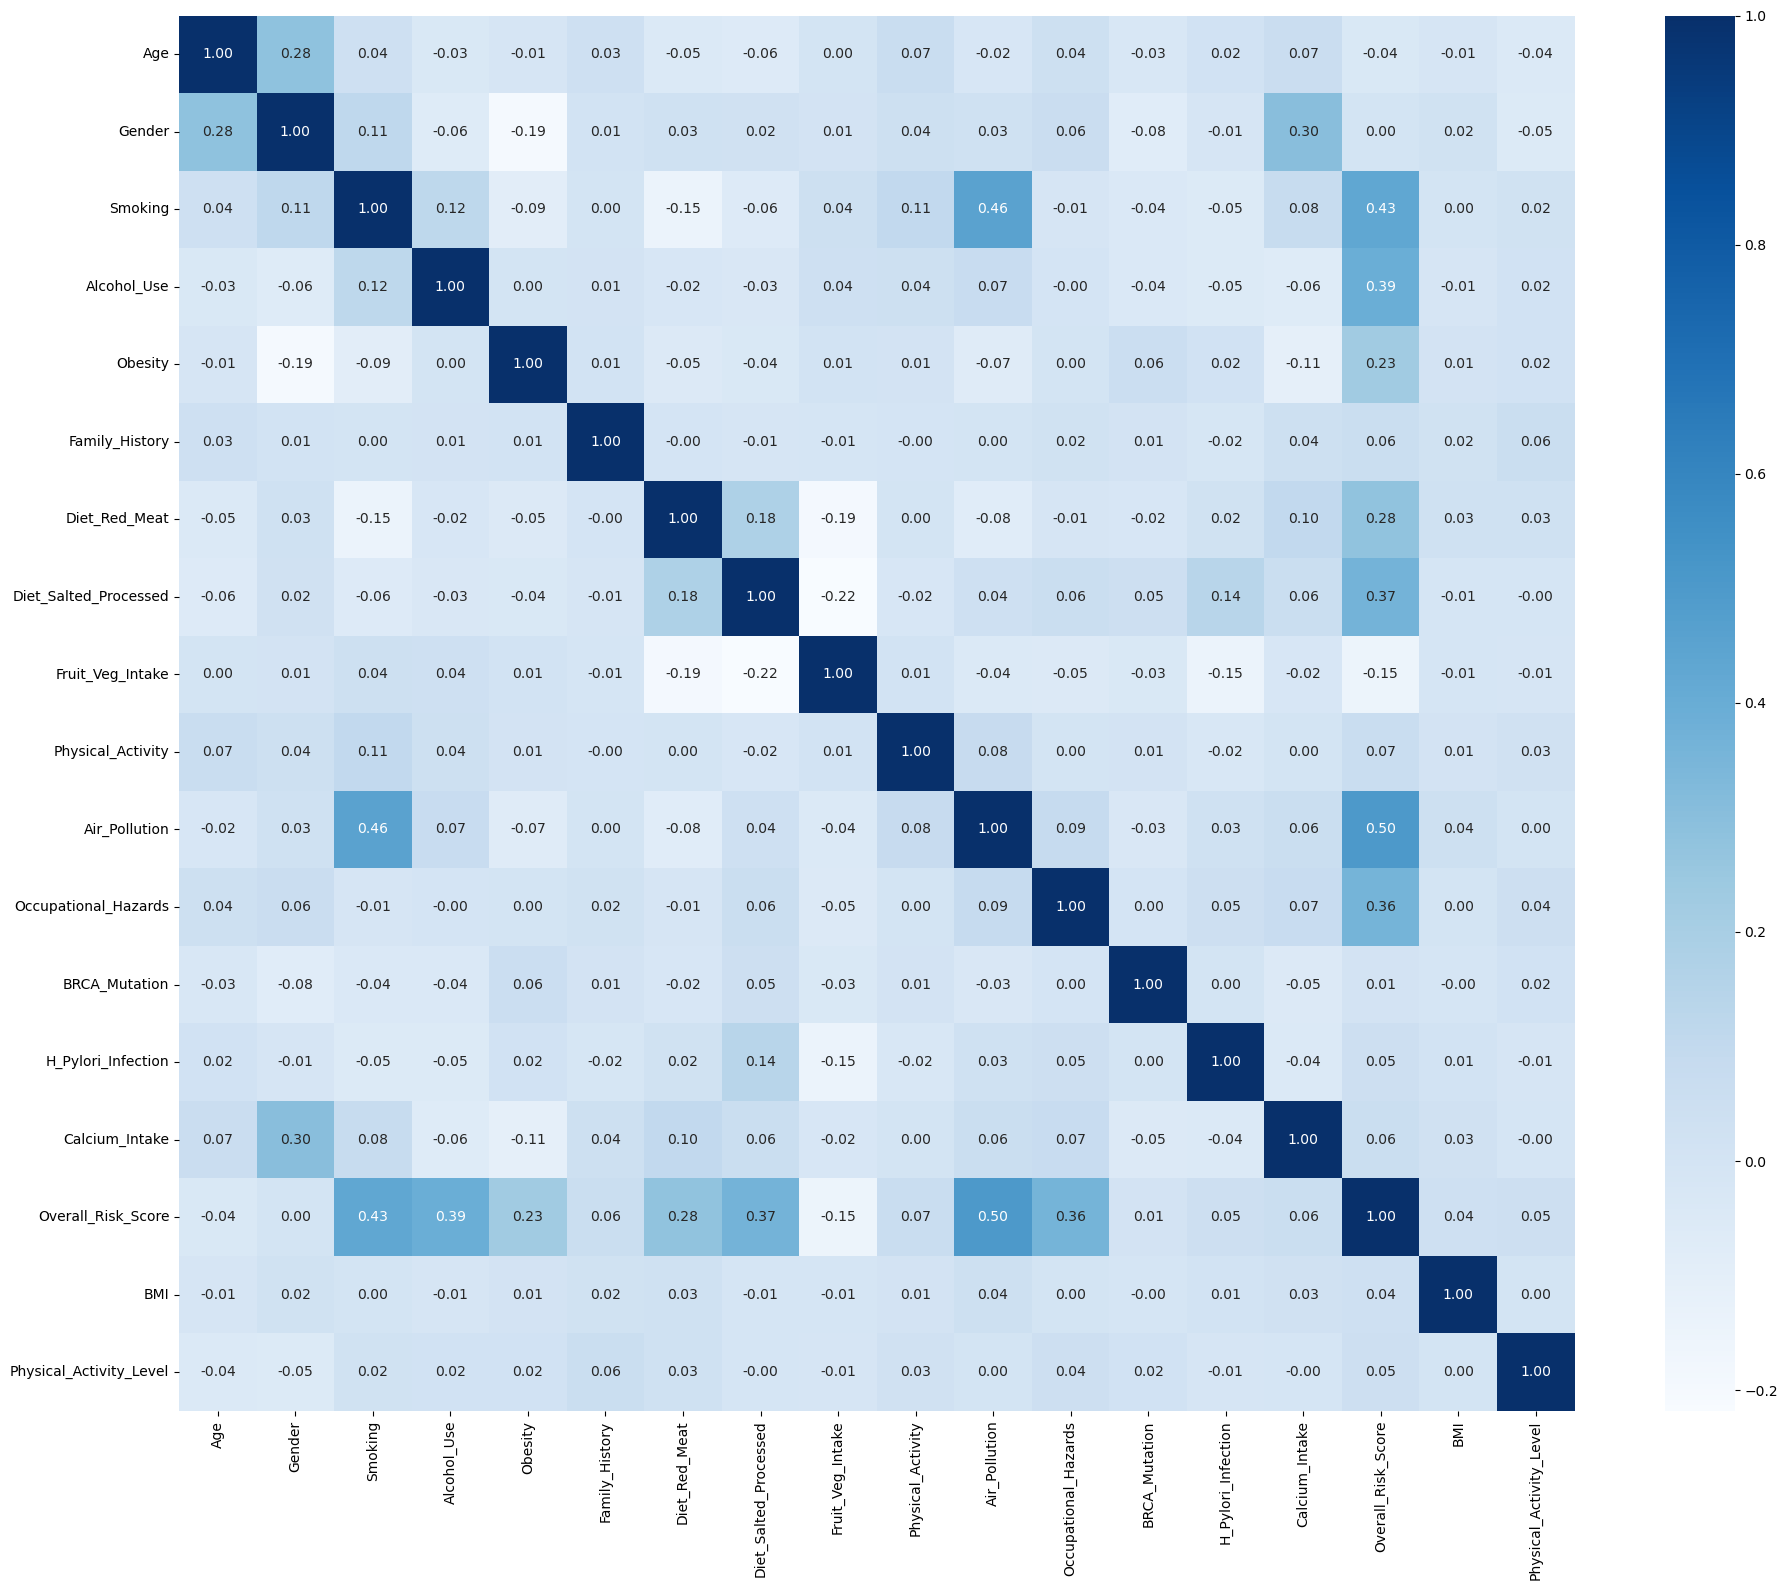

In [18]:
#checking if any of the numberical variables have high correlation
corr = df.select_dtypes(include="number").corr()

#creating bigger figure
plt.figure(figsize=(20, 16)) 
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [19]:
df.dtypes

Patient_ID                  object
Cancer_Type                 object
Age                          int64
Gender                       int64
Smoking                      int64
Alcohol_Use                  int64
Obesity                      int64
Family_History               int64
Diet_Red_Meat                int64
Diet_Salted_Processed        int64
Fruit_Veg_Intake             int64
Physical_Activity            int64
Air_Pollution                int64
Occupational_Hazards         int64
BRCA_Mutation                int64
H_Pylori_Infection           int64
Calcium_Intake               int64
Overall_Risk_Score         float64
BMI                        float64
Physical_Activity_Level      int64
Risk_Level                  object
dtype: object

Define y (target) and x (dropping columns)

In [20]:
#split off target first
y = df["Overall_Risk_Score"]
X = df.drop(columns=["Overall_Risk_Score"]) 

print(X.columns)

Index(['Patient_ID', 'Cancer_Type', 'Age', 'Gender', 'Smoking', 'Alcohol_Use',
       'Obesity', 'Family_History', 'Diet_Red_Meat', 'Diet_Salted_Processed',
       'Fruit_Veg_Intake', 'Physical_Activity', 'Air_Pollution',
       'Occupational_Hazards', 'BRCA_Mutation', 'H_Pylori_Infection',
       'Calcium_Intake', 'BMI', 'Physical_Activity_Level', 'Risk_Level'],
      dtype='object')


Automatically preprocesses the dataset by one-hot encoding categorical features and scaling numerical features using a ColumnTransformer

In [21]:
#detect columns from X (not df - only looking at data where target has been removed)
categorical_cols = X.select_dtypes(include=["object"]).columns 
numeric_cols = X.select_dtypes(exclude=["object"]).columns

#build preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols), #onehot encoding
        ("num", StandardScaler(), numeric_cols), #scales numerical features so income (e.g. 80,000) does not dominates bmi (e.g. 22) barely matters in regression.
    ],
    remainder="drop",
)


Split/test data, Linear regression 

In [22]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#pipeline (running preprocessor + model)
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

#train the model
model.fit(X_train, y_train)

print("Train R²:", model.score(X_train, y_train))
print("Test  R²:", model.score(X_test, y_test))

Train R²: 0.9999999999892571
Test  R²: 0.8314346402677322


/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


DecisonTreeRegressor

In [23]:
tree = DecisionTreeRegressor(
    max_depth=6,         #limit how deep it can grow
    min_samples_split=20, 
    min_samples_leaf=15,
    random_state=42
)
tree_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", tree)
])

tree_pipeline.fit(X_train, y_train)

print("Train R2:", tree_pipeline.score(X_train, y_train))
print("Test  R2:", tree_pipeline.score(X_test, y_test))

Train R2: 0.7485181636454297
Test  R2: 0.6365827889038544


/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


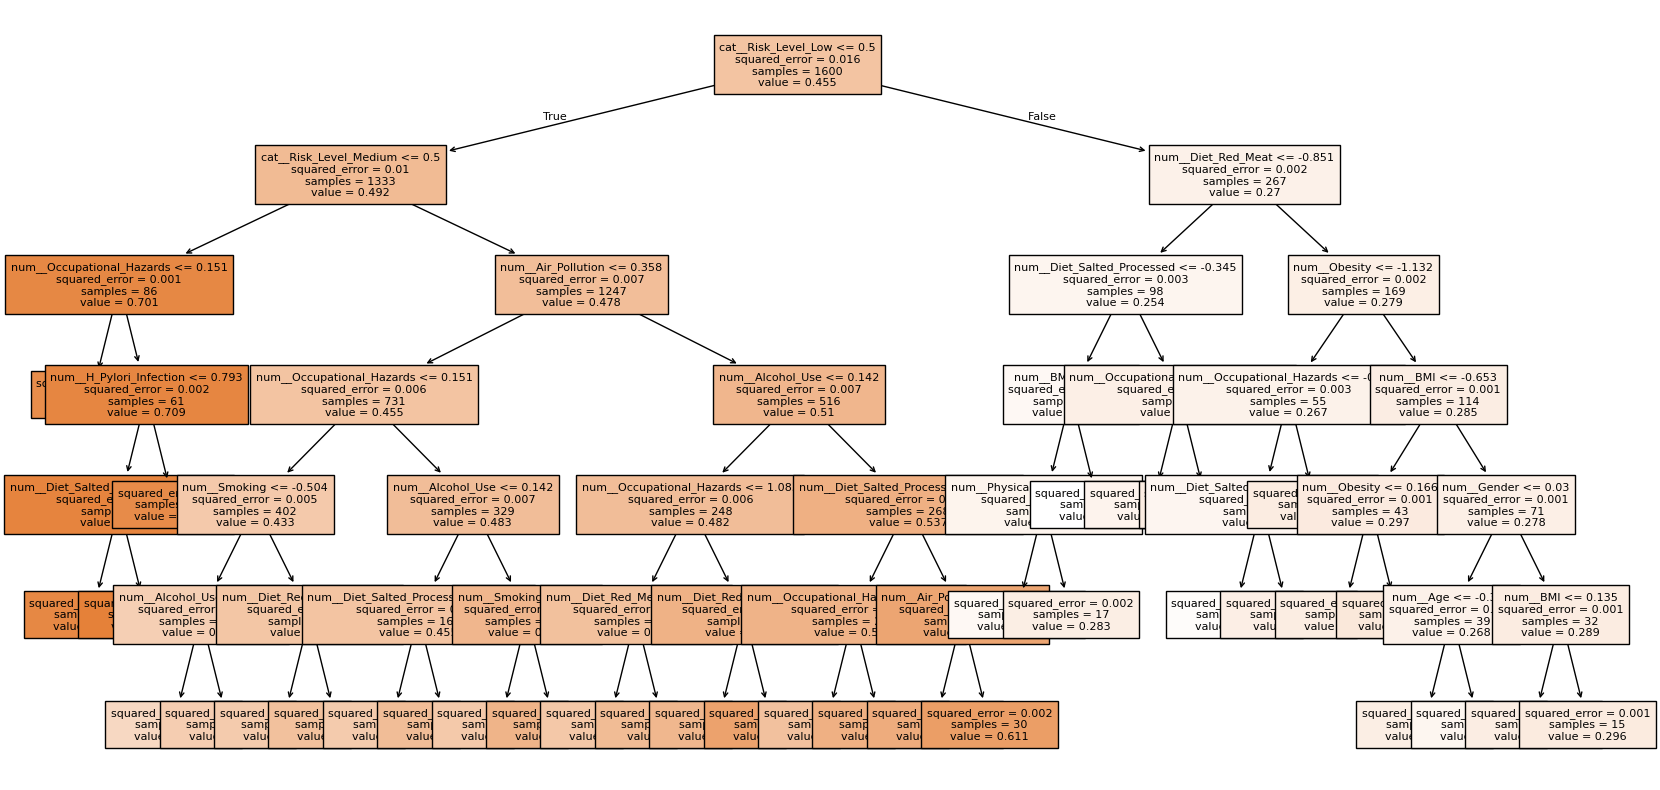

In [24]:
from sklearn import tree

feature_names = tree_pipeline.named_steps["preprocessor"].get_feature_names_out() #get feature names after preprocessing


plt.figure(figsize=(20, 10)) #create a bigger figure for better readability

tree.plot_tree(
    tree_pipeline.named_steps["regressor"], #access the decision tree model from the pipeline
    feature_names=feature_names, #use the feature names from preprocessor
    filled=True,
    fontsize=8
)

plt.show()

Defining our regressor-function that calls other models

In [25]:
def evaluate_regressor(name, model, X_train, X_test, y_train, y_test): #evaluate regression model performance
    y_pred_train = model.predict(X_train)  
    y_pred_test = model.predict(X_test)     

    mse_train = mean_squared_error(y_train, y_pred_train) #calculate mean squared error
    mse_test = mean_squared_error(y_test, y_pred_test)

    rmse_train = np.sqrt(mse_train) #calculate root mean squared error
    rmse_test = np.sqrt(mse_test)

    mae_train = mean_absolute_error(y_train, y_pred_train) #calculate mean absolute error
    mae_test = mean_absolute_error(y_test, y_pred_test)

    r2_train = r2_score(y_train, y_pred_train) #calculate R-squared
    r2_test = r2_score(y_test, y_pred_test)

    print(f"{name}")
    print(f"Train: RMSE={rmse_train:.2f}, MAE={mae_train:.2f}, R²={r2_train:.3f}") 
    print(f"Test:  RMSE={rmse_test:.2f}, MAE={mae_test:.2f}, R²={r2_test:.3f}")
    print()


Evaluation of linear regression and decision tree

In [26]:
evaluate_regressor("Linear Regression", model, X_train, X_test, y_train, y_test) #evaluate linear regression model
evaluate_regressor("Decision Tree", tree_pipeline, X_train, X_test, y_train, y_test) #evaluate decision tree model

Linear Regression
Train: RMSE=0.00, MAE=0.00, R²=1.000
Test:  RMSE=0.05, MAE=0.04, R²=0.831

Decision Tree
Train: RMSE=0.06, MAE=0.05, R²=0.749
Test:  RMSE=0.07, MAE=0.06, R²=0.637



/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Ridge and Lasso using 5-fold cross-validation

In [27]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV

ridge = Pipeline(steps=[ #create ridge regression pipeline 
    ("preprocessor", preprocessor),
    ("regressor", RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5))
])

lasso = Pipeline(steps=[ #create lasso regression pipeline
    ("preprocessor", preprocessor),
    ("regressor", LassoCV(alphas=[0.001, 0.01, 0.1, 1.0], cv=5, max_iter=5000))
])

ridge.fit(X_train, y_train) 
lasso.fit(X_train, y_train)

evaluate_regressor("Ridge Regression", ridge, X_train, X_test, y_train, y_test) 
evaluate_regressor("Lasso Regression", lasso, X_train, X_test, y_train, y_test)

print("Ridge best alpha:", ridge.named_steps["regressor"].alpha_)
print("Lasso best alpha:", lasso.named_steps["regressor"].alpha_)


Ridge Regression
Train: RMSE=0.02, MAE=0.02, R²=0.969
Test:  RMSE=0.05, MAE=0.04, R²=0.844

Lasso Regression
Train: RMSE=0.05, MAE=0.04, R²=0.868
Test:  RMSE=0.05, MAE=0.04, R²=0.838

Ridge best alpha: 1.0
Lasso best alpha: 0.001


/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Bagging

In [28]:
rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1
    ))
])

rf.fit(X_train, y_train) 

evaluate_regressor("Random Forest", rf, X_train, X_test, y_train, y_test)


Random Forest
Train: RMSE=0.03, MAE=0.03, R²=0.922
Test:  RMSE=0.05, MAE=0.04, R²=0.780



/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Finding the most important features in RandomForest

In [29]:
rf_reg = rf.named_steps["regressor"]
importances = rf_reg.feature_importances_

feature_names = rf.named_steps["preprocessor"].get_feature_names_out()

import pandas as pd

importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

print(importance_df.head(20))


                           feature  importance
1603           cat__Risk_Level_Low    0.484282
1604        cat__Risk_Level_Medium    0.175970
1615            num__Air_Pollution    0.055537
1608              num__Alcohol_Use    0.047447
1616     num__Occupational_Hazards    0.047122
1612    num__Diet_Salted_Processed    0.037425
1611            num__Diet_Red_Meat    0.036710
1607                  num__Smoking    0.032092
1609                  num__Obesity    0.026762
1620                      num__BMI    0.011755
1605                      num__Age    0.010656
1621  num__Physical_Activity_Level    0.007041
1613         num__Fruit_Veg_Intake    0.006983
1619           num__Calcium_Intake    0.006522
1614        num__Physical_Activity    0.005822
1606                   num__Gender    0.001568
1601     cat__Cancer_Type_Prostate    0.001372
1599        cat__Cancer_Type_Colon    0.001282
1600         cat__Cancer_Type_Lung    0.001245
1610           num__Family_History    0.000935


Boosting

In [30]:

gbr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])


gbr.fit(X_train, y_train)

evaluate_regressor("Gradient Boosting", gbr, X_train, X_test, y_train, y_test)



Gradient Boosting
Train: RMSE=0.04, MAE=0.03, R²=0.898
Test:  RMSE=0.05, MAE=0.04, R²=0.816



/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


XGBoosting

In [31]:
from xgboost import XGBRegressor

xgbr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(
        n_estimators=300,        #number of trees
        learning_rate=0.05,      #step size shrinkage
        max_depth=4,             #tree depth
        subsample=0.8,           #row sampling
        colsample_bytree=0.8,    #column sampling per tree
        random_state=42,
        objective="reg:squarederror"
    ))
])

xgbr.fit(X_train, y_train)

evaluate_regressor("XGBoost", xgbr, X_train, X_test, y_train, y_test)


XGBoost
Train: RMSE=0.03, MAE=0.02, R²=0.941
Test:  RMSE=0.05, MAE=0.04, R²=0.827



/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


KNearestNeighbor

In [32]:
# #PRØV FORSKELLIGE K-VÆRDIER I KNN (F.EKS. 3, 7, 10) OG SAMMENLIGN RESULTATERNE (SMALL K VÆRDIER KAN GIVE OVERFITTING (HØJ VARIANS), STØRRE K VÆRDIER KAN GIVE UNDERFITTING (BIAS))
# from sklearn.neighbors import KNeighborsRegressor

# k_values = [1, 3, 5, 7, 10, 15] #different k values to try
# for k in k_values: #loop through k values
#     knn_k = Pipeline(steps=[ #create KNN regression pipeline
#         ("preprocessor", preprocessor),
#         ("regressor", KNeighborsRegressor(n_neighbors=k))
#     ])
#     knn_k.fit(X_train, y_train)
#     evaluate_regressor(f"KNN (k={k})", knn_k, X_train, X_test, y_train, y_test) 


GridSearch KNN - systematic hyperparameter tuning with cross-validation

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

#hyperparameter tuning for KNN
param_grid_knn = {
    "regressor__n_neighbors": [3, 5, 7, 10, 12, 15, 20, 30, 40, 100, 200], #try different k values
    "regressor__weights": ["uniform", "distance"] #try both uniform and distance weighting, where closer neighbors have more influence
}

#create KNN regression pipeline
knn_base = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", KNeighborsRegressor())
])

#grid search with 5-fold cross-validation
grid_knn = GridSearchCV(
    knn_base,
    param_grid_knn,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

#fit grid search
grid_knn.fit(X_train, y_train)
print("Best params KNN:", grid_knn.best_params_)

evaluate_regressor("KNN (tuned)", grid_knn.best_estimator_, X_train, X_test, y_train, y_test)


/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Best params KNN: {'regressor__n_neighbors': 12, 'regressor__weights': 'distance'}
KNN (tuned)
Train: RMSE=0.00, MAE=0.00, R²=1.000
Test:  RMSE=0.07, MAE=0.05, R²=0.672



/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Baseline model - skal den stå her?

In [34]:
from sklearn.dummy import DummyRegressor
baseline = Pipeline(steps=[
    ("preprocessor", preprocessor),      
    ("regressor", DummyRegressor(strategy="mean")) #baseline predicting mean value
])

baseline.fit(X_train, y_train) #fit baseline model

evaluate_regressor("Baseline (mean)", baseline, X_train, X_test, y_train, y_test)

Baseline (mean)
Train: RMSE=0.12, MAE=0.10, R²=0.000
Test:  RMSE=0.12, MAE=0.09, R²=-0.001



/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Creating a table for all of our results

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#list to store results from all models
results = []

def evaluate_regressor(name, model, X_train, X_test, y_train, y_test):
    #printing metrics and storing them in the global `results` list
    #predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    #errors
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    #print nicely
    print(f"{name}")
    print(f"Train: RMSE={rmse_train:.2f}, MAE={mae_train:.2f}, R²={r2_train:.3f}")
    print(f"Test:  RMSE={rmse_test:.2f}, MAE={mae_test:.2f}, R²={r2_test:.3f}")
    print()

    #store in results list for later DataFrame
    results.append({
        "model": name,
        "rmse_train": rmse_train,
        "rmse_test": rmse_test,
        "mae_train": mae_train,
        "mae_test": mae_test,
        "r2_train": r2_train,
        "r2_test": r2_test
    })

evaluate_regressor("Linear Regression", model, X_train, X_test, y_train, y_test)
evaluate_regressor("Baseline (mean)", baseline, X_train, X_test, y_train, y_test)
evaluate_regressor("Decision Tree", tree_pipeline, X_train, X_test, y_train, y_test)
evaluate_regressor("Ridge Regression", ridge, X_train, X_test, y_train, y_test)
evaluate_regressor("Lasso Regression", lasso, X_train, X_test, y_train, y_test)
evaluate_regressor("Random Forest", rf, X_train, X_test, y_train, y_test)
evaluate_regressor("Gradient Boosting", gbr, X_train, X_test, y_train, y_test)
evaluate_regressor("Grid KNN", grid_knn, X_train, X_test, y_train, y_test)


from IPython.display import display

results_df = pd.DataFrame(results)

#round for nicer display
results_df_rounded = results_df.copy()
results_df_rounded[["rmse_train","rmse_test","mae_train","mae_test","r2_train","r2_test"]] = \
    results_df_rounded[["rmse_train","rmse_test","mae_train","mae_test","r2_train","r2_test"]].round(3)

#sort by best (lowest) test RMSE and display as a table
display(results_df_rounded.sort_values("rmse_test"))

Linear Regression
Train: RMSE=0.00, MAE=0.00, R²=1.000
Test:  RMSE=0.05, MAE=0.04, R²=0.831

Baseline (mean)
Train: RMSE=0.12, MAE=0.10, R²=0.000
Test:  RMSE=0.12, MAE=0.09, R²=-0.001

Decision Tree
Train: RMSE=0.06, MAE=0.05, R²=0.749
Test:  RMSE=0.07, MAE=0.06, R²=0.637

Ridge Regression
Train: RMSE=0.02, MAE=0.02, R²=0.969
Test:  RMSE=0.05, MAE=0.04, R²=0.844

Lasso Regression
Train: RMSE=0.05, MAE=0.04, R²=0.868
Test:  RMSE=0.05, MAE=0.04, R²=0.838



/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Random Forest
Train: RMSE=0.03, MAE=0.03, R²=0.922
Test:  RMSE=0.05, MAE=0.04, R²=0.780

Gradient Boosting
Train: RMSE=0.04, MAE=0.03, R²=0.898
Test:  RMSE=0.05, MAE=0.04, R²=0.816

Grid KNN
Train: RMSE=0.00, MAE=0.00, R²=1.000
Test:  RMSE=0.07, MAE=0.05, R²=0.672



,model,rmse_train,rmse_test,mae_train,mae_test,r2_train,r2_test
3,Ridge Regression,0.022,0.046,0.018,0.037,0.969,0.844
4,Lasso Regression,0.045,0.047,0.037,0.038,0.868,0.838
0,Linear Regression,0.000,0.048,0.000,0.039,1.000,0.831
6,Gradient Boosting,0.040,0.050,0.032,0.040,0.898,0.816
5,Random Forest,0.035,0.055,0.028,0.044,0.922,0.780
7,Grid KNN,0.000,0.067,0.000,0.052,1.000,0.672
2,Decision Tree,0.062,0.070,0.050,0.055,0.749,0.637
1,Baseline (mean),0.125,0.117,0.101,0.094,0.000,-0.001


Residual (error) analysis for our chosen regression model

/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


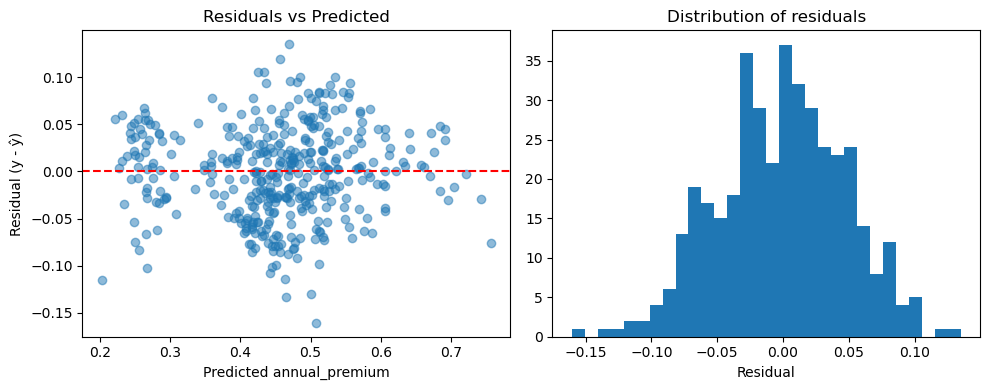

In [36]:
best_model = xgbr  #or gbr, or ridge - choosing our best model

y_pred = best_model.predict(X_test) #model is predicting values for test-set
residuals = y_test - y_pred #difference between correct value and the model's prediction

plt.figure(figsize=(10,4))

#residuals vs predicted - plotting the graph
plt.subplot(1,2,1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--") #red line indicates no errors - the closer the points are, the better the model has predicted
plt.xlabel("Predicted annual_premium")
plt.ylabel("Residual (y - ŷ)")
plt.title("Residuals vs Predicted")

#histogram of residuals to show the distribution of errors 
plt.subplot(1,2,2)
plt.hist(residuals, bins=30)
plt.xlabel("Residual")
plt.title("Distribution of residuals")

plt.tight_layout()
plt.show()

                                                                                                                                                                                    ALL CODE BELOW BELONGS TO CLUSTERING

Prepping for clustering with KMeans

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#scale numeric data so the features hold the same weight
X_num = df[numeric_cols]
X_scaled = StandardScaler().fit_transform(X_num) 

inertias = []
silhouettes = []
k_values = range(2, 8)

#asking KMeans to make k clusters
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)

    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

print("Inertias:", inertias)
print("Silhouettes:", silhouettes)


Inertias: [31496.94471760112, 29918.658623643554, 28565.80918636103, 27517.12933771485, 25946.98307850594, 25071.436044325623]
Silhouettes: [np.float64(0.07506346057073732), np.float64(0.06759375968132511), np.float64(0.06877226990558635), np.float64(0.0676837779718403), np.float64(0.07372102136145303), np.float64(0.07071115127318063)]


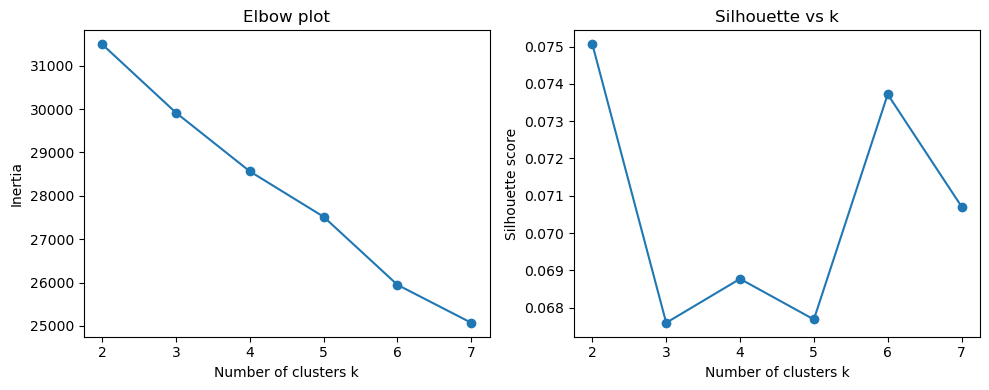

In [38]:
k_values = range(2, 8)

plt.figure(figsize=(10,4))

#elbow (inertia)
plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, marker="o")
plt.xlabel("Number of clusters k")
plt.ylabel("Inertia")
plt.title("Elbow plot")

#silhouette
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouettes, marker="o")
plt.xlabel("Number of clusters k")
plt.ylabel("Silhouette score")
plt.title("Silhouette vs k")

plt.tight_layout()
plt.show()


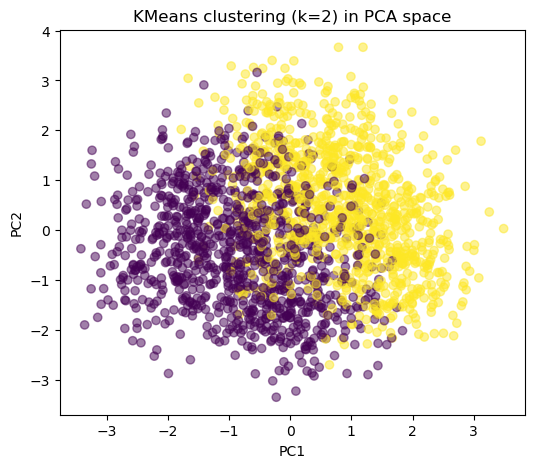

               Age    Gender   Smoking  Alcohol_Use   Obesity  Family_History  \
cluster                                                                         
0        60.074479  0.010924  4.711023     5.256207  6.650447        0.182721   
1        66.466264  0.973817  5.609265     4.810675  5.274924        0.206445   

         Diet_Red_Meat  Diet_Salted_Processed  Fruit_Veg_Intake  \
cluster                                                           
0             5.052632               4.471698          4.894737   
1             5.328298               4.656596          4.960725   

         Physical_Activity  Air_Pollution  Occupational_Hazards  \
cluster                                                           
0                 3.838133       5.132075              4.723932   
1                 4.194361       5.516616              5.237664   

         BRCA_Mutation  H_Pylori_Infection  Calcium_Intake        BMI  \
cluster                                                         

In [39]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#choosing k= 2 because that is our best silhouette
best_k = 2

km = KMeans(n_clusters=best_k, random_state=42, n_init=1, max_iter=100)
labels = km.fit_predict(X_scaled)

#project to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled) 

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"KMeans clustering (k={best_k}) in PCA space")
plt.show()

#taking the mean of every value in each cluster
df_clusters = df.copy()
df_clusters["cluster"] = labels

print(df_clusters.groupby("cluster")[numeric_cols].mean())

Måske ikke pensum: Fairness check by gender (or similar column) AND Fairness / group comparison by age groups

In [40]:
#choose main model for evaluation / fairness checks
#(change to model if we prefer another)
best_model = gbr

#predictions for all rows in the original X
y_pred_all = best_model.predict(X)

df_eval = df.copy()
df_eval["y_true"] = y
df_eval["y_pred"] = y_pred_all

#inspect categorical columns so you know what you can group by
cat_cols = df.select_dtypes(include="object").columns.tolist()
print("Categorical columns in the data:", cat_cols)

#choose a categorical column to check fairness / group differences
#change if our dataset uses another name (e.g. "gender", "smoker", "region")
group_col = "sex"   #try "sex" first; if that doesn't exist, change to one of cat_cols above

if group_col in df_eval.columns:
    print(f"\nAverage true & predicted annual_premium by {group_col}:")
    print(
        df_eval.groupby(group_col)[["y_true", "y_pred"]].mean()
    )
else:
    print(f"\nColumn {group_col!r} not found. "
          f"Set group_col to one of these: {cat_cols}")

#age-group comparison (only if an 'age' column exists)
age_col = "age"     #change if your age column has another name

if age_col in df_eval.columns:
    df_eval["age_bin"] = pd.cut(
        df_eval[age_col],
        bins=[0, 30, 50, 100],
        labels=["<30", "30–50", ">50"]
    )

    print("\nAverage true & predicted annual_premium by age group:")
    print(
        df_eval.groupby("age_bin")[["y_true", "y_pred"]].mean()
    )
else:
    print(f"\nColumn {age_col!r} not found – skipping age-group analysis.")

Categorical columns in the data: ['Patient_ID', 'Cancer_Type', 'Risk_Level']

Column 'sex' not found. Set group_col to one of these: ['Patient_ID', 'Cancer_Type', 'Risk_Level']

Column 'age' not found – skipping age-group analysis.


/opt/anaconda3/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
